<img src="image1.png" width="500">

In [47]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize

In [48]:
sim = Aer.get_backend('aer_simulator') # симулятор квантового компьютера

In [49]:
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

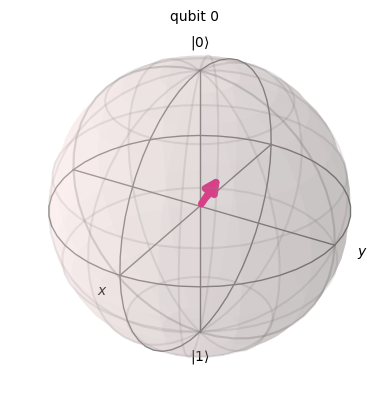

In [50]:
# Рандомный вектор состояния телепортируемого кубита
psi = random_statevector(2)
init_gate = Initialize(psi)
qc.append(init_gate, [0])
plot_bloch_multivector(psi)


In [51]:
# Запутанная пара
qc.h(1)
qc.cx(1, 2)

In [52]:
# Действия Алисы
qc.barrier()
qc.cx(0, 1)
qc.h(0)

In [53]:
# Алиса измеряет телепортируемый кубит и кубит запутанной пары
qc.barrier()
qc.measure(0, 0)
qc.measure(1,1)

In [54]:
# Дейстия Боба при получении информации о измеренных битах от Алисы
qc.barrier()
qc.x(2).c_if(crx,1)
qc.z(2).c_if(crz,1)

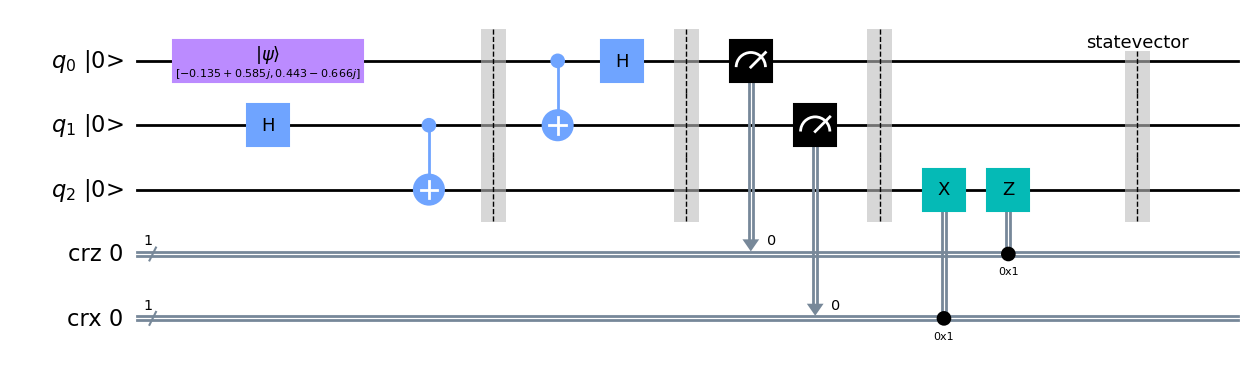

In [55]:
qc.save_statevector()
qc.draw(output='mpl', initial_state=True)

In [56]:
result = sim.run(qc).result()
psi = result.get_statevector() # вектор состояния
array_to_latex(psi, prefix="|\psi> = \n")

<IPython.core.display.Latex object>

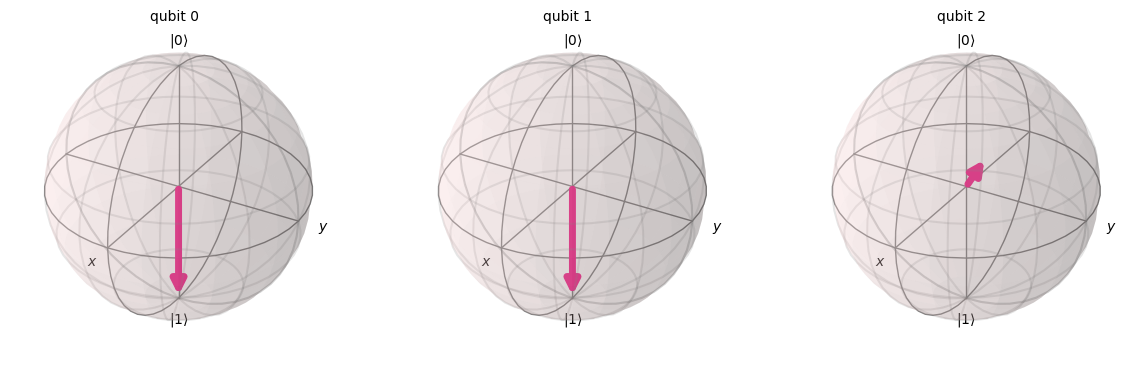

In [57]:
plot_bloch_multivector(psi)